<a href="https://colab.research.google.com/github/9characters/ML-projects/blob/main/Prediction_cricket_chirps_based_on_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Preparation**

Selecting **TFv1** to use its functionalities.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Using **gdown** to download the dataset from the google drive.

In [ ]:
!gdown --id 1ayndAG0JMvRu750PbPuvZkWb6Wdd0B8d

Downloading...
From: https://drive.google.com/uc?id=1ayndAG0JMvRu750PbPuvZkWb6Wdd0B8d
To: /content/cricket_data.csv
100% 537/537 [00:00<00:00, 2.24MB/s]


Importing all the necessary **packages**.

In [ ]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

Reading the **CSV data** of chirps and temperature.

In [ ]:
data = pd.read_csv("cricket_data.csv", names=["chirps", "temp"], skiprows=1)

Separating **dependent** and **independent** variabels.

In [ ]:
X = data.iloc[:, 1].dropna().values   # temperature
y = data.iloc[:, 0].dropna().values   # chirps/15s

Splitting the dataset into **training** (38), **validation**(14) and **testing** sets (3).

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.15, random_state=25)
print(f"Number of training data: {len(X_train)}")
print(f"Number of validation data: {len(X_val)}")
print(f"Number of test data: {len(X_test)}")

Number of training data: 38
Number of validation data: 14
Number of test data: 3


Plotting the training data in a scatter plot to see the distribution of data.

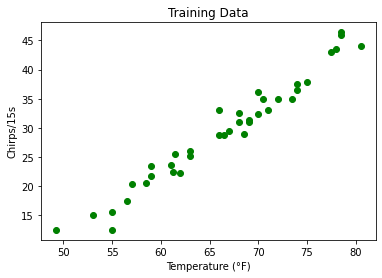

In [ ]:
plt.scatter(X_train, y_train, c="green")
plt.title("Training Data")
plt.xlabel("Temperature (°F)")
plt.ylabel("Chirps/15s")
plt.show()

Plotting the validation data in a **scatter** plot to see the distributon of the data.

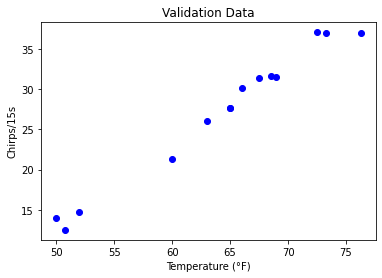

In [ ]:
plt.scatter(X_val, y_val, c="blue")
plt.title("Validation Data")
plt.xlabel("Temperature (°F)")
plt.ylabel("Chirps/15s")
plt.show()

#**Fitting the training data into the linear model**

Using the **polyfit** method on the training set, to find the optimal value of **slope** and **bias**.

In [ ]:
model_params = np.polyfit(X_train, y_train, 1)
slope = model_params[0]
bias = model_params[1]
print(slope)
print(bias)

1.130854342252503
-45.64663721546238


Calculating the **RMSE** value for the predicted and actual training labels. The **RMSE** value is pretty low, therefore for the training data, the model predicts almost accurately.

In [ ]:
y_pred = list(map(int, (slope * X_train) + bias))
train_rmse = math.sqrt(metrics.mean_squared_error(y_pred, y_train))
print(f"The RMSE for the training data is: {train_rmse}")

The RMSE for the training data is: 1.8235392495739824


Drawing the **linear line** using the predicted **slope** and **bias** on the scatter plot of training data, to see the actual model-fitting scenario.

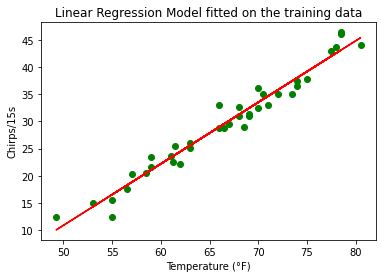

In [ ]:
plt.scatter(X_train, y_train, c="green")
plt.title("Linear Regression Model fitted on the training data")
plt.xlabel("Temperature (°F)")
plt.ylabel("Chirps/15s")
plt.plot(X_train, (X_train*slope) + bias, color="red")
plt.show()

#**Using the model on the validation data**

Calculating the **RMSE** score for the for the validation data, and it came out to be 1.72 which is pretty low enough to have decent predictions.

In [ ]:
y_pred = list(map(int, (slope * X_val) + bias))
val_rmse = math.sqrt(metrics.mean_squared_error(y_pred, y_val))
print(f"The RMSE for the validation data is: {val_rmse}")

The RMSE for the validation data is: 1.7223841449738042


Drawing the **linear line** using the predicted **slope** and **bias** on the scatter plot of test data, how to model fits on the test data.

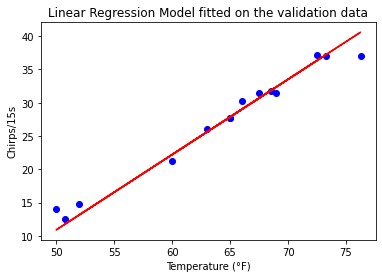

In [ ]:
plt.scatter(X_val, y_val, c="blue")
plt.title("Linear Regression Model fitted on the validation data")
plt.xlabel("Temperature (°F)")
plt.ylabel("Chirps/15s")
plt.plot(X_val, (X_val*slope) + bias, color="red")
plt.show()

#**Testing on the new data using the optimal model**

Finally, **testing** the the model on 3 test data which we separeted in the beginning.

In [ ]:
y_preds = list(map(int, (slope * X_test) + bias))
for temp, y, y_pred in zip(X_test, y_test.astype(int), y_preds):
  print(f"For {temp} °F:\n\tActual number cricket chirps/15s is: {y}")
  print(f"\tPredicted number cricket chirps/15s is: {y_pred}\n")

For 52.0 °F:
	Actual number cricket chirps/15s is: 18
	Predicted number cricket chirps/15s is: 13

For 66.0 °F:
	Actual number cricket chirps/15s is: 28
	Predicted number cricket chirps/15s is: 28

For 72.5 °F:
	Actual number cricket chirps/15s is: 36
	Predicted number cricket chirps/15s is: 36



#**Inference/Prediction by the model**

Getting the **new data** from the user.

In [ ]:
new_temp = int(input("Please enter the temperature (°F): "))

Please enter the temperature (°F): 56


Using **TFv1** to make the computational graph and use the **Linear Regression** model to predict/infer the cricket chirps/15s at given temperature.

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  x_input = tf.placeholder(tf.float32)
  y_tensor = slope * x_input + bias
  y_pred_new = int(sess.run(y_tensor, {x_input: new_temp}))
  print(f"For {new_temp},°F, the expected number of cricket chirps/15s is {y_pred_new}")

For 56,°F, the expected number of cricket chirps/15s is 17


#**Conclusion**

* First, I loaded the dataset and splitted into training, validation and test sets. Since dataset was not so big, I used 38 training data, 14 validation data and 3 test data. 
* Then I used the polyfit method of numpy which uses the **Least Square Method** to find the optimal value of slope and bias. For the input training data (x) and output data (y), we can obtain the optimal slope and bias using the following least square method, where $\bar{x}$ and $\bar{y}$ are the corresponding means.
*$\mathbf{slope} = \frac{(\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y}))} {\sum_{i=1}^n (x_i - \bar{x})^2}$
*$\mathbf{bias} = \bar{y} - \mathbf{slope} \cdot \bar{x}$
* **Observed Parameters**:
      slope = 1.130854342252503
      bias = -45.64663721546238
* Then I used the linear regression model to predict on the validation set, to validate the result. The result came out to be pretty good.
* **RMSE Findings**
      RMSE on training data: 1.8235392495739824
      RMSE on validation data: 1.7223841449738042
      Difference in RMSEs: 0.10115510460017818
*The low difference in RMSE shows that the model is very almost perfectly fitted, therefore, can be used for predictions.
*Then I checked the model on the test data and compared with the actual data to and found out very little difference in the result.
*Therefore, it can be conluded that so created linear regression model can almost accurately predict the cricket chirps/15s at the given temperature, still we can improve the predictions by obtaining more continuous dataset with subtle differences in temperature.
*Colab Link: https://colab.research.google.com/drive/1s9JFwK0TqI_oqOCl9mEsKDM2n5cJcZgu?usp=sharing

